In [28]:
import pandas as pd
import numpy as np
import math
import warnings
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.graphics.gofplots import ProbPlot


In [2]:
path ='C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-2/Lesson 4/table_8_offenses_known_to_law_enforcement_florida_by_city_2013.csv'
crime = pd.read_csv(path,header=4)

In [3]:
crime.drop(columns=['Rape\n(revised\ndefinition)1'],axis=1)
int(crime.loc[10]['Population'].replace(',',''))

37357

In [4]:
crime['Population'] = crime['Population'].apply(lambda x: float(str(x).replace(',','')))
crime['Population_2'] = crime['Population'].apply(lambda x: float(str(x).replace(',',''))**2)

crime['Robbery']= crime['Robbery'].apply(lambda x: str(x).replace('\'\'',''))
crime['Robbery']= crime['Robbery'].apply(lambda x: float(str(x).replace(',','')))

crime['Murder'] = np.where(crime[crime.columns[3]]>0, 1, 0)

crime['Robbery']= np.where(crime['Robbery']>0, 1, 0)

crime['Aggrevated'] = crime[crime.columns[7]].apply(lambda x: str(x).replace('\'\'',''))
crime['Aggrevated'] = crime[crime.columns[7]].apply(lambda x: float(str(x).replace(',','')))

crime['Population'].idxmax(axis=0)

107

,Population,Population_2,Robbery,Murder,Aggrevated
count,289.000000,2.890000e+02,292.000000,292.000000,289.000000
mean,29503.896194,3.381749e+09,0.818493,0.356164,104.391003
std,50199.491854,1.451428e+10,0.386099,0.479687,243.751074
min,90.000000,8.100000e+03,0.000000,0.000000,0.000000
25%,3472.000000,1.205478e+07,1.000000,0.000000,6.000000
50%,11890.000000,1.413721e+08,1.000000,0.000000,30.000000
75%,35493.000000,1.259753e+09,1.000000,1.000000,98.000000
max,418394.000000,1.750535e+11,1.000000,1.000000,2562.000000


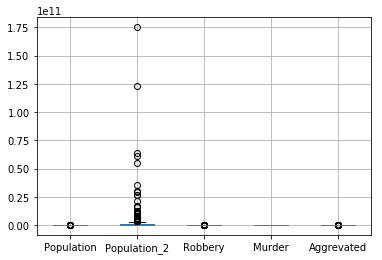

In [6]:
features = pd.DataFrame()
features[['Population','Population_2','Robbery','Murder','Aggrevated']] = crime[['Population','Population_2','Robbery','Murder','Aggrevated']]
features = features.drop(features['Population'].idxmax(axis=0))
features[['Population','Population_2','Robbery','Murder','Aggrevated']].boxplot()
features[['Population','Population_2','Robbery','Murder','Aggrevated']].describe()

In [7]:
regr = linear_model.LinearRegression()
X = features[['Population','Population_2','Robbery','Murder','Aggrevated']]
X['Property']= crime[crime.columns[8]].apply(lambda x: float(str(x).replace(',','')))
features['Property']= crime[crime.columns[8]].apply(lambda x: float(str(x).replace(',','')))

In [8]:
X = X.dropna(axis=0,how='any')
X = X.drop(0)
X_temp = X
Y_temp = X['Property']
X_feat1 = X_temp[['Population','Robbery','Murder','Aggrevated']]
Y_feat1 = Y_temp
Y_feat2 = np.sqrt(Y_temp)
regr.fit(X_feat1, Y_feat1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_feat1, Y_feat1))


Coefficients: 
 [1.63426604e-02 6.62006395e+01 6.76604310e+01 5.61216032e+00]

Intercept: 
 -17.19215694693503

R-squared:
0.9187441679792003


In [16]:
# Extract predicted values.
predicted = regr.predict(X_feat1).ravel()
actual = Y_feat1
# Calculate the error, also called the residual.
residual = actual - predicted

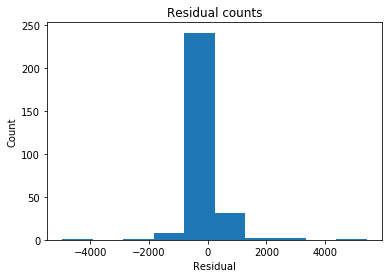

In [17]:
# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

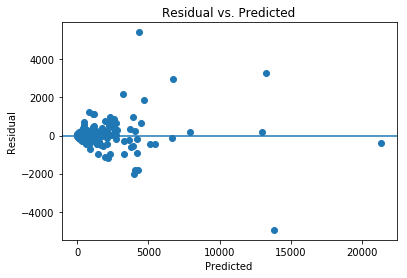

In [12]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [30]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Property ~ Population+Robbery+Murder+Aggrevated'

# Fit the model to our data using the formula.
lm_fit = smf.ols(formula=linear_formula, data=X_temp).fit()

In [21]:
lm.params


Intercept    -17.192157
Population     0.016343
Robbery       66.200640
Murder        67.660431
Aggrevated     5.612160
dtype: float64

In [22]:
lm.pvalues


Intercept     8.521807e-01
Population    1.416639e-20
Robbery       5.375850e-01
Murder        4.603906e-01
Aggrevated    1.795510e-45
dtype: float64

In [31]:
lm_fitted_y = lm_fit.fittedvalues

# model residuals
lm_residuals = lm_fit.resid

# normalized residuals
lm_norm_residuals = lm_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
lm_norm_residuals_abs_sqrt = np.sqrt(np.abs(lm_norm_residuals))

# absolute residuals
lm_abs_resid = np.abs(lm_residuals)

# leverage, from statsmodels internals
lm_leverage = lm_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
lm_cooks = lm_fit.get_influence().cooks_distance[0]

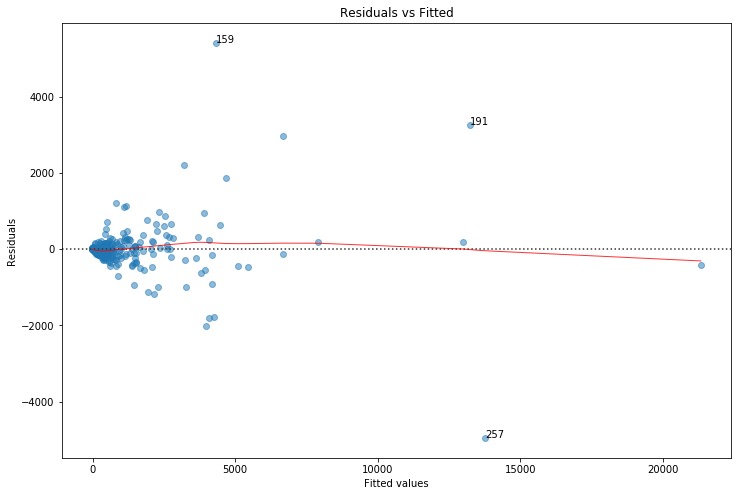

In [34]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(lm_fitted_y, 'Property', data=X, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = lm_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(lm_fitted_y[i], 
                                   lm_residuals[i]));

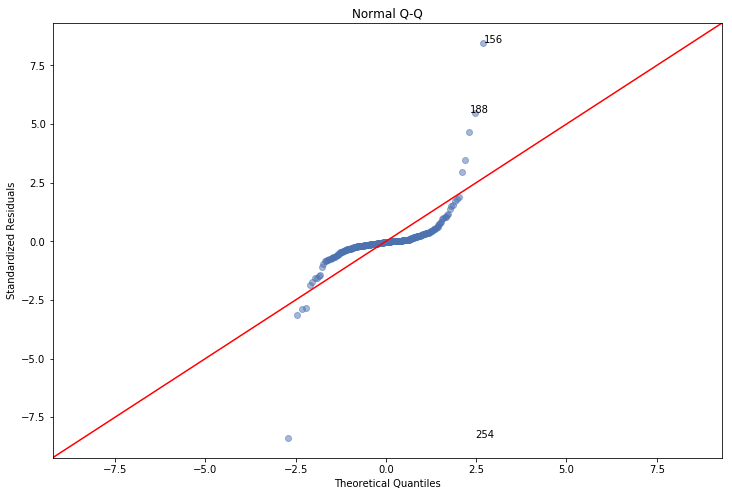

In [42]:
QQ = ProbPlot(lm_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(lm_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   lm_norm_residuals[i]));

In [25]:
linear_formula = 'Property ~ Population+Aggrevated'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=X_temp).fit()

In [26]:
lm.rsquared


0.9183989448618244